# Linear Regression

In [1]:
# Data points are releated linearly coorelated. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [3]:
# load data

# training data
df_train = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') 

# testing data
df_eval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') 

In [4]:
df_train.head(10)

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
5,0,male,2.0,3,1,21.0750,Third,unknown,Southampton,n
6,1,female,27.0,0,2,11.1333,Third,unknown,Southampton,n
7,1,female,14.0,1,0,30.0708,Second,unknown,Cherbourg,n
8,1,female,4.0,1,1,16.7000,Third,G,Southampton,n
9,0,male,20.0,0,0,8.0500,Third,unknown,Southampton,y


In [5]:
y_train = df_train.pop('survived')
y_eval = df_eval.pop('survived')

(y_train)

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64

In [6]:
df_train

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...
622,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,female,19.0,0,0,30.0000,First,B,Southampton,y
625,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [7]:
print(df_train.iloc[2] , y_train.iloc[2])

sex                        female
age                          26.0
n_siblings_spouses              0
parch                           0
fare                        7.925
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 2, dtype: object 1


In [8]:
df_train.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [9]:
df_train.shape

(627, 9)

<AxesSubplot:>

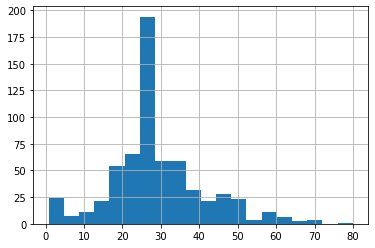

In [10]:
df_train.age.hist(bins=20)

<AxesSubplot:>

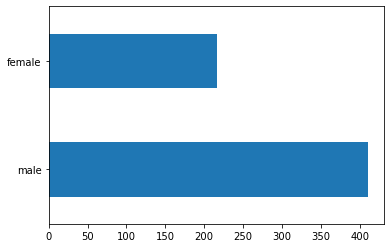

In [11]:
df_train.sex.value_counts().plot(kind='barh')

<AxesSubplot:>

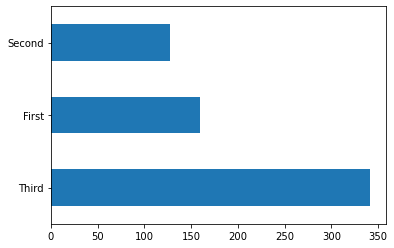

In [12]:
df_train['class'].value_counts().plot(kind='barh')

In [13]:
df2 = pd.concat([df_train , y_train],axis=1)
df2

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone,survived
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n,0
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n,1
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y,1
3,female,35.0,1,0,53.1000,First,C,Southampton,n,1
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y,0
...,...,...,...,...,...,...,...,...,...,...
622,male,28.0,0,0,10.5000,Second,unknown,Southampton,y,0
623,male,25.0,0,0,7.0500,Third,unknown,Southampton,y,0
624,female,19.0,0,0,30.0000,First,B,Southampton,y,1
625,female,28.0,1,2,23.4500,Third,unknown,Southampton,n,0


In [14]:
gb = df2.groupby(by='sex').survived.mean()
gb

sex
female    0.778802
male      0.180488
Name: survived, dtype: float64

Text(0.5, 0, '% survived')

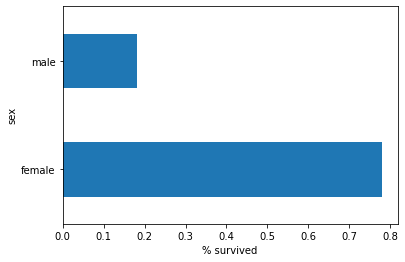

In [15]:
gb.plot(kind='barh').set_xlabel('% survived')

In [16]:
# testing set
df_eval.shape

(264, 9)

In [17]:
# Making 'feature_columns '

CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
    
    # gets a list of all unique values from given feature column
    vocabulary = df_train[feature_name].unique()  
    print(vocabulary)

    #this will assign a unique value(id) to each of the elements in the vocabulary list and attach the feature name with it
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))
    print(feature_columns)
    print('\n')
      

for feature_name in NUMERIC_COLUMNS:
    
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

['male' 'female']
[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)]


[1 0 3 4 2 5 8]
[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0)]


[0 1 2 5 3 4]
[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0)]


['Third' 'First' 'Second']
[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'

In [18]:
feature_columns[0]

VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [19]:
feature_columns[4]

VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0)

In [20]:
# epochs - if we have 10 epochs , our model will see the dataset 10 times

In [21]:
# The TensorFlow model we are going to use requires that the data we pass it comes in as a 'tf.data.Dataset object'. 
# This means we must create a input function that can convert our current pandas dataframe into that object.


def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    
    def input_function():  # inner function, this will be returned
        
        # create tf.data.Dataset object with data and its label
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  
        
        if shuffle:
             # randomize order of data(shuffle the dataset)
            ds = ds.shuffle(1000) 
            
         # split dataset into batches of 32 and repeat process for number of epochs
        ds = ds.batch(batch_size).repeat(num_epochs) 
        
        # return a batch of the dataset
        return ds 
    return input_function  # return a function object for use

# here we will call the input_function that was returned to us to get a dataset object we can feed to the model
train_input_fn = make_input_fn(df_train, y_train)  
eval_input_fn = make_input_fn(df_eval, y_eval, num_epochs=1, shuffle=False) #shuffle=False because we are not training on this dataset

In [22]:
# , a learning algorithm is an Estimator which trains on a DataFrame and produces a model.

# create model
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\nishc\\AppData\\Local\\Temp\\tmp3eicalpg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [23]:
# training the model
linear_est.train(input_fn=train_input_fn)

# get model stats/metrics by testing on testing data
result = linear_est.evaluate(input_fn=eval_input_fn)

# print(result)
print('accuracy',result['accuracy']) #around 76% accuracy

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.


C:\Users\nishc\anaconda3\lib\site-packages\tensorflow_estimator\python\estimator\canned\linear.py:1468: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  self.bias = self.add_variable(


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\nishc\AppData\Local\Temp\tmp3eicalpg\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 0.6931472, step = 0
INFO:tensorflow:global_step/sec: 117.17
INFO:tensorflow:loss = 0.4270056, step = 100 (0.857 sec)
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 200...
INFO:tensorflow:Saving checkpoints for 200 into C:\Users\nishc\AppData\Local\Temp\tmp3eicalpg\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 200...
INFO:tensorflow:Loss for fi

In [24]:
# check the actual predictions
result = list(linear_est.predict(input_fn=eval_input_fn))
# print(result)
print(df_eval.loc[0])
print(result[0]['probabilities']) #survival % = 4.3

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\nishc\AppData\Local\Temp\tmp3eicalpg\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                          male
age                          35.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
[0.9380196  0.06198037]


In [25]:
print(df_eval.loc[2])
print(f'actual value is {y_eval.loc[2]}')
print(result[2]['probabilities']) #55.18%  = survival %

sex                        female
age                          58.0
n_siblings_spouses              0
parch                           0
fare                        26.55
class                       First
deck                            C
embark_town           Southampton
alone                           y
Name: 2, dtype: object
actual value is 1
[0.30447823 0.6955218 ]


In [26]:
print(df_eval.loc[4])
print(f'actual value is : {y_eval.loc[4]}')
print('predicted value is :' ,result[4]['probabilities']) #16.76%  = survival %

sex                          male
age                          34.0
n_siblings_spouses              0
parch                           0
fare                         13.0
class                      Second
deck                            D
embark_town           Southampton
alone                           y
Name: 4, dtype: object
actual value is : 1
predicted value is : [0.7685524 0.2314476]


# Classification

In [27]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

In [28]:
# Downloads a file from a URL if it not already in the cache.
train_path = tf.keras.utils.get_file(
    fname="iris_training.csv",
    origin = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    fname = "iris_test.csv",
    origin = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

In [29]:
train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

In [30]:
train
# speces - > 0 (Setosa ),1('Versicolor'),2(Virginica)   

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0
...,...,...,...,...,...
115,5.5,2.6,4.4,1.2,1
116,5.7,3.0,4.2,1.2,1
117,4.4,2.9,1.4,0.2,0
118,4.8,3.0,1.4,0.1,0


In [31]:
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head() # the species column is now gone

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [32]:
train.shape #1 column removed

(120, 4)

In [33]:
train_y

0      2
1      1
2      2
3      0
4      0
      ..
115    1
116    1
117    0
118    0
119    1
Name: Species, Length: 120, dtype: int64

In [34]:
# Input function -> to convert our dataframe to 'tf.data.Dataset object'
def input_fn(features, labels, training=True, batch_size=256):
    # Convert the inputs to a Dataset.
    dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels))

    # Shuffle and repeat if you are in training mode.
    if training:
        # The method shuffle() shuffles the samples in the dataset.
        #The buffer_size is the number of samples which are randomized and returned as tf.Dataset.
        dataset = dataset.shuffle(1000).repeat()
    
    #batch(batch_size) -> Creates batches of the dataset with batch size given as batch_size
    #which is also the length of the batches.
    return dataset.batch(batch_size)


In [35]:
# Feature columns describe how to use the input.

my_feature_columns = []
for feature_names in train.keys():
    
#     tf.feature_column.numeric_column -> Represents real valued or numerical features.
    my_feature_columns.append(tf.feature_column.numeric_column(key=feature_names))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [36]:
# building a model
# DNN(Deep Neural Network) is best to choose because we may not be able to find a linear
# correspondance in our data

# DNN with 2  hidden layers with 30 and 10 hidden nodes each
classifier = tf.estimator.DNNClassifier(
                       # Two hidden layer with 30 and 10 hidden units respectively
                                        hidden_units = [30,10],
                                        feature_columns = my_feature_columns,
                      # The model must choose between 3 classes
                                        n_classes = 3
                                        )

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\nishc\\AppData\\Local\\Temp\\tmp7x_lif9a', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [37]:
#train the model
classifier.train(input_fn = lambda: input_fn(features=train,labels=train_y,training=True),
                steps = 5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\nishc\AppData\Local\Temp\tmp7x_lif9a\model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1.4850173, step = 0
INFO:tensorflow:global_step/sec: 146.378
INFO:tensorflow:loss = 1.0728626, step = 100 (0.685 sec)
INFO:tensorflow:global_step/sec: 216.325
INFO:tensorflow:loss = 1.0148983, step = 200 (0.462 sec)
INFO:tensorflow:global_step/sec: 213.8
INFO:tensorflow:loss = 0.97973865, step = 300 (0.467 sec)
INFO:tensorflow:global_step/sec: 227.517
INFO:tensorflow:loss = 0.9609742, step = 400 (0.439 sec)
INFO:tensorflow:global_step/sec: 165.176
INFO:tensorflow:loss = 0.9365417, s

In [38]:
# evaluate the model on the test set
eval_result = classifier.evaluate(input_fn=lambda:input_fn(features=test,labels=test_y,training=False))
print(f'\nTest set accuracy :{eval_result}')

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-07-16T09:32:56
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\nishc\AppData\Local\Temp\tmp7x_lif9a\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.35538s
INFO:tensorflow:Finished evaluation at 2022-07-16-09:32:56
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.93333334, average_loss = 0.52696794, global_step = 5000, loss = 0.52696794
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: C:\Users\nishc\AppData\Local\Temp\tmp7x_lif9a\model.ckpt-5000

Test set accuracy :{'accuracy': 0.93333334, 'average_loss': 0.52696794, 'loss': 0.52696794, 'global_step': 5000}


In [39]:
# input funtion for predictions(this make a tf.Dataset without the labels)
def input_fn(features,batch_size=256):
    #convert the inputs to a Dataset without 'labels'
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

In [48]:
features = ['SepalLength','SepalWidth','PetalLength','PetalWidth']
predict = {}

print('Please type numeric values as prompted. ')
for feature in features:
    valid = True
    while valid == True:
        val = input(feature + ": ")
        if not val.isdigit():
            print('is valid is false')
            valid = False
        print(val)
    predict[feature] = [float(val)] #the predict() in tf works on multiple things and not just one value
    print(predict)
    
predictions = classifier.predict(input_fn=lambda:input_fn(predict))
for pred_dict in predictions:
    print(pred_dict)
#     the 'predictions' has predictions in form of dictionaries
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]
    
    print('Predictions is "{}" ({:.1f}%)'.format(SPECIES[class_id],100 * probability))

Please type numeric values as prompted. 
SepalLength: 1.1
is valid is false
1.1
{'SepalLength': [1.1]}
SepalWidth: 2
2
SepalWidth: 3
3
SepalWidth: 3
3
SepalWidth: 3
3
SepalWidth: 1.1
is valid is false
1.1
{'SepalLength': [1.1], 'SepalWidth': [1.1]}
PetalLength: 2.2
is valid is false
2.2
{'SepalLength': [1.1], 'SepalWidth': [1.1], 'PetalLength': [2.2]}
PetalWidth: 3.3
is valid is false
3.3
{'SepalLength': [1.1], 'SepalWidth': [1.1], 'PetalLength': [2.2], 'PetalWidth': [3.3]}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\nishc\AppData\Local\Temp\tmp7x_lif9a\model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'logits': array([ 0.04210806, -0.92055744,  1.3038183 ], dtype=float32), 'probabilities': array([0.20352796, 0.07772197, 0.71875006], dtype=float32), 'class_ids': array([2], dtype=int64), 'classes': array([b'2'], dtype=obje

# Hidden Markov Model

States: In each markov model we have a finite set of states. These states could be something like "warm" and "cold" or "high" and "low" or even "red", "green" and "blue". These states are "hidden" within the model,
which means we do not direcly observe them.

Observations: Each state has a particular outcome or observation associated with it based on a probability distribution. An example of this is the following: On a hot day Tim has a 80% chance of being happy and a 20% chance of being sad.

Transitions: Each state will have a probability defining the likelyhood of transitioning to a different state. An example is the following: a cold day has a 30% chance of being followed by a hot day and a 70% chance of being follwed by another cold day.

To create a hidden markov model we need.

States ,
Observation Distribution ,
Transition Distribution

In [49]:
import tensorflow_probability as tfp #different module from tensorflow

We will model a simple weather system and try to predict the temperature on each day given the following information.

1.Cold days are encoded by a 0 and hot days are encoded by a 1.<br>
2.The first day in our sequence has an 80% chance of being cold.<br>
3.A cold day has a 30% chance of being followed by a hot day.<br>
4.A hot day has a 20% chance of being followed by a cold day.<br>
5.On each day the temperature is normally distributed with mean and standard deviation 0 and 5 on a cold day and mean and standard deviation 15 and 10 on a hot day.

In [51]:
tfd = tfp.distributions
#point 2 (we have 2 states(hot and cold) , so 2 probabilities)
# starting on a cold day ,80% chance of being cold, 20% chance of being hot
initial_distribution = tfd.Categorical(probs=[0.8,0.2])

# point 3 and 4 (we have 2 states(hot and cold) , so 2 probabilities)
# on a cold day, we have a 70% chance of having a cold day and 30% change of having hot day
# on a hot day, we have a 20% chance of having a cold day and 80% change of having hot day
transition_distribution = tfd.Categorical(probs=[[0.7,0.3],
                                                 [0.2,0.8]])

# the loc arguement is mean and scale is standard deviation
observation_distribution = tfd.Normal(loc=[0.,15.],scale=[5.,10.])

In [53]:
# create a hidden markov model
model = tfd.HiddenMarkovModel(initial_distribution=initial_distribution,
                              transition_distribution=transition_distribution,
                              observation_distribution=observation_distribution,
                              num_steps = 7)

# num_steps -> the number of days that we would like to predict information.
# here num_steps = 7 so entire week

In [54]:
mean = model.mean()

with tf.compat.v1.Session() as sess:
    print(mean.numpy())
    
# we have the expected temperatures on each day
# remember we stated with a cold day (80%) probability, temprature is going higher

[2.9999998 5.9999995 7.4999995 8.25      8.625     8.812501  8.90625  ]


In [58]:
# adjusting the probabilities
# starting on a hot day
initial_distribution = tfd.Categorical(probs=[0.2,0.8])

# point 3 and 4 (we have 2 states(hot and cold) , so 2 probabilities)
# on a cold day, we have a 50% chance of having a cold day and 50% change of having hot day
# on a hot day, we have a 20% chance of having a cold day and 80% change of having hot day
transition_distribution = tfd.Categorical(probs=[[0.5,0.5],
                                                 [0.2,0.8]])

# the loc arguement is mean and scale is standard deviation
observation_distribution = tfd.Normal(loc=[0.,15.],scale=[5.,10.])

In [59]:
model = tfd.HiddenMarkovModel(initial_distribution=initial_distribution,
                              transition_distribution=transition_distribution,
                              observation_distribution=observation_distribution,
                              num_steps = 7)

In [60]:
mean = model.mean()

with tf.compat.v1.Session() as sess:
    print(mean.numpy())
    
# temperature is decreasing slightly

[11.999999 11.1      10.830001 10.748999 10.724698 10.71741  10.715222]
